In [1]:
import game_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def str_to_numb(txt):
    word = str(txt)
    number = 0
    for letter in word:
        number += ord(letter)
    return number


In [3]:
game = game_engine.Game()

In [4]:
game_engine.AGENT1 = "op"
game_engine.AGENT2 = "random"

Winnrate for Player 1: 0.51
Winnrate for Player 2: 0.49


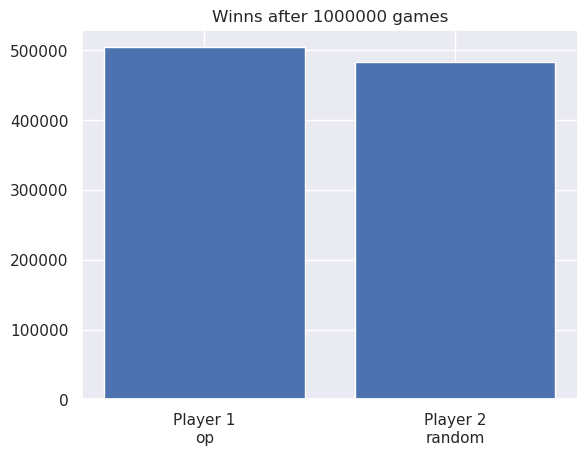

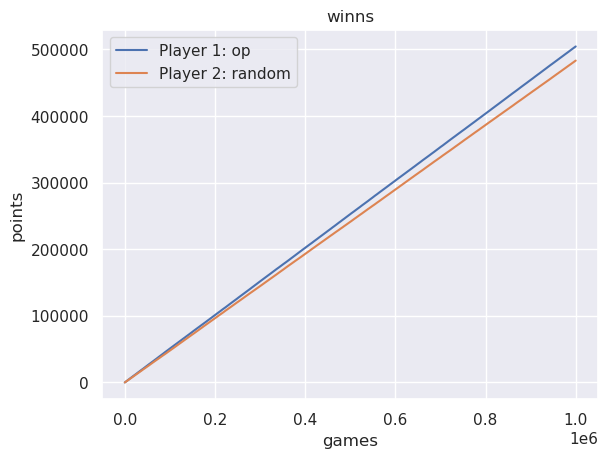

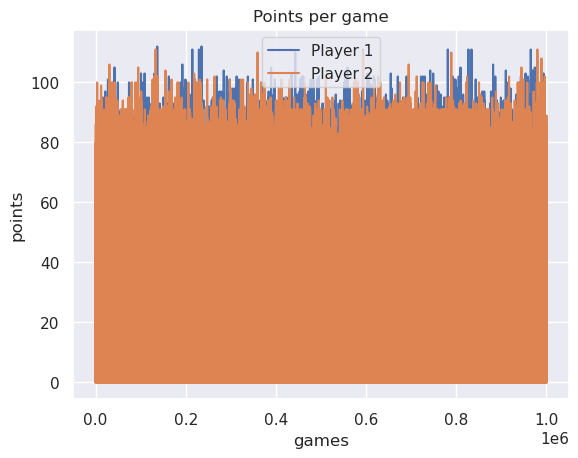

CPU times: user 17min 12s, sys: 2min 21s, total: 19min 33s
Wall time: 19min 38s


In [8]:
%%time


data = []

x = []  # round
y1 = []  # points player 1
y2 = []  # points player 1
w1 = 0  # wins player 1
w2 = 0  # wins player 2
win = []

rounds = 1_000_000

for i in range(1, rounds + 1):
    data.append(game.play_game())

for i, dat in enumerate(data):
    x.append(i)
    y1.append(dat[0].points)
    y2.append(dat[1].points)

    if dat[0].points > dat[1].points:
        w1 += 1
        win.append([1, 0])
    elif dat[0].points < dat[1].points:
        w2 +=1
        win.append([0, 1])
    else:
        win.append([0, 0])

# print(game.data)
conf_data = []
for row in game.data:
    row_list = []
    row_list.append(str_to_numb(row[0]))
    for item in row[1]:
        row_list.append(str_to_numb(item))
    row_list.append(row[2])
    row_list.append(row[3])
    conf_data.append(row_list)

df = pd.DataFrame(conf_data)
# print(df)
        
print(f"Winnrate for Player 1: {w1/(w1+w2):0.2f}")
print(f"Winnrate for Player 2: {w2/(w1+w2):0.2f}")


# win statistic
plt.bar([1, 2], [w1, w2])
plt.xticks([1, 2], [f"Player 1\n{game_engine.AGENT1}", f"Player 2\n{game_engine.AGENT2}"])
plt.title(f"Winns after {rounds} games")
plt.show()


win1 = []
win2 = []
for w in win:
    win1.append(w[0])
    win2.append(w[1])

if True:
    # cumsum of winnings
    plt.plot(x, np.cumsum(win1), label=f"Player 1: {game_engine.AGENT1}")
    plt.plot(x, np.cumsum(win2), label=f"Player 2: {game_engine.AGENT2}")
    plt.xlabel("games")
    plt.ylabel("points")
    plt.title(f"winns")
    plt.legend()
    plt.show()



if True:
    # points per game
    plt.plot(x, y1, label="Player 1")
    plt.plot(x, y2, label="Player 2")
    plt.xlabel("games")
    plt.ylabel("points")
    plt.title(f"Points per game")
    plt.legend()
    plt.show()